# "Forecasting: [...] Practice"

This jupyter notebook is based on the book "Forecasting: Principles and Practice" by R.J. Hyndman and G. Athanasopoulos (https://otexts.com/fpp3/). Here I develope some of the codes used in the book but adapted to Python.

Each section should be self-contain so that you do not need to run all the previous code.

## 1.- Getting started

### 1.1.- What can be forecast ? 

The predictability of an event or a quantity depends on several factors including:

* how well we understand the factors that contribute to it;
* how much data is available;
* how similar the future is to the past;
* whether the forecasts can affect the thing we are trying to forecast.

### 1.6.- The basic steps in a forecasting task

* Step 1: Problem definition.
* Step 2: Gathering information.
* Step 3: Preliminary (exploratory) analysis.
* Step 4: Choosing and fitting models.
* Step 5: Using and evaluating a forecasting model.


## 2.- Time series graphics

### 2.1.- _Pandas Data Frame_ objects

In [1]:
import os 
import pandas as pd 
from dotenv import load_dotenv

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

In [37]:
df.describe()

,Temperature
count,209228.000000
mean,13.020512
std,4.258447
min,-0.600000
25%,10.500000
50%,12.800000
75%,15.500000
max,34.000000


### 2.2.- Time plots

In [ ]:
import os 
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

<Figure size 800x1200 with 0 Axes>

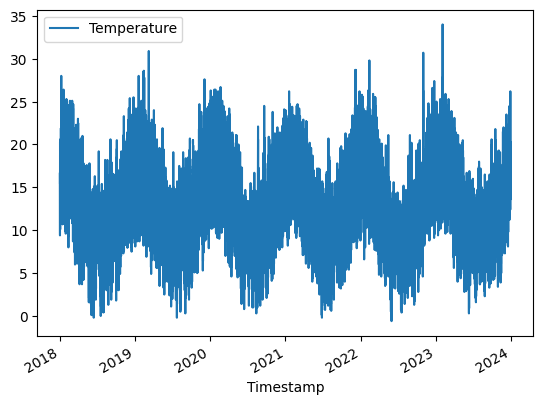

<Figure size 800x1200 with 0 Axes>

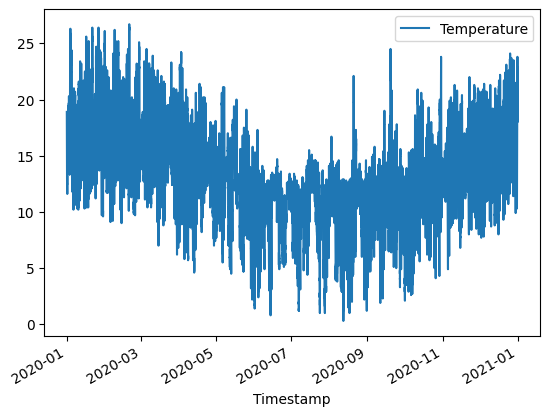

<Figure size 800x1200 with 0 Axes>

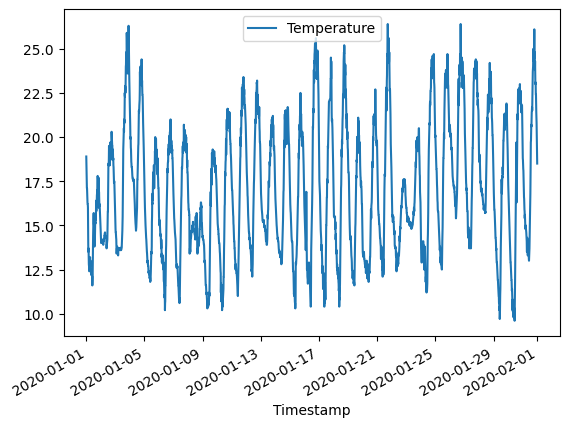

<Figure size 800x1200 with 0 Axes>

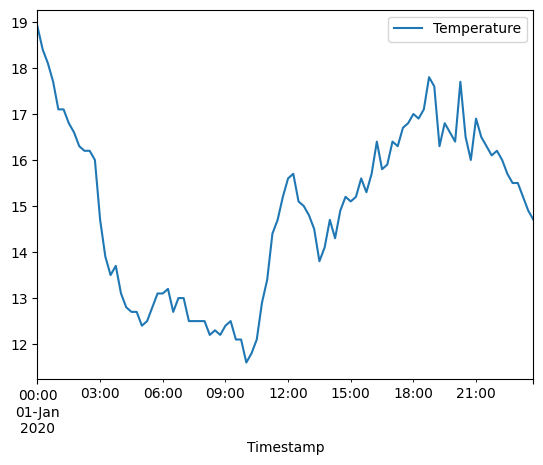

In [36]:
plt.figure(figsize = (8,12))
df.plot()
plt.show()

plt.figure(figsize = (8,12))
df.loc['2020'].plot()
plt.show()

plt.figure(figsize = (8,12))
df.loc['2020-01'].plot()
plt.show()

plt.figure(figsize = (8,12))
df.loc['2020-01-01'].plot()
plt.show()

### 2.3.- Time series patterns

* **Trend:** A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.
* **Seasonal:** A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known period.
* **Cyclic:** A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency.

### 2.4.- Seasonal plots

In [38]:
import os 
import numpy as np
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

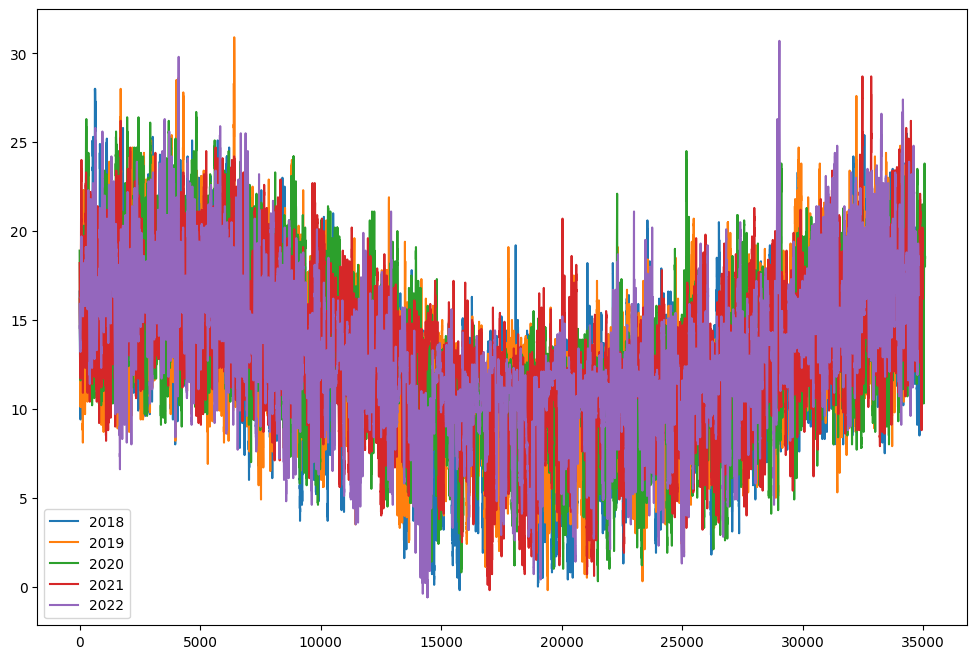

In [93]:
plt.figure(figsize = (12,8)) 
for year in range(2018,2023):
    plt.plot(df.loc[str(year)].values,label = str(year))
    plt.legend()
#plt.xticks(np.arange(0,12),np.arange(1,13))
plt.show()

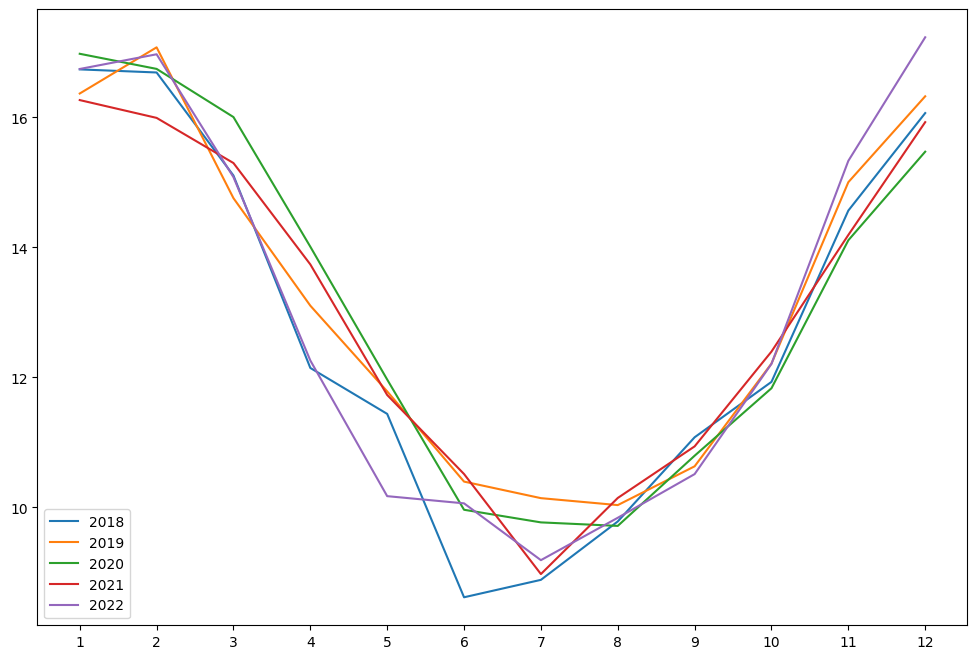

In [91]:
plt.figure(figsize = (12,8)) 
for year in range(2018,2023):
    plt.plot(df.loc[str(year)].resample('1ME').mean().values,label = str(year))
    plt.legend()
plt.xticks(np.arange(0,12),np.arange(1,13))
plt.show()

### 2.5.- Seasonal subseries plots

In [63]:
import os 
import numpy as np
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

In [79]:
df_resample = df.resample('1ME').mean()

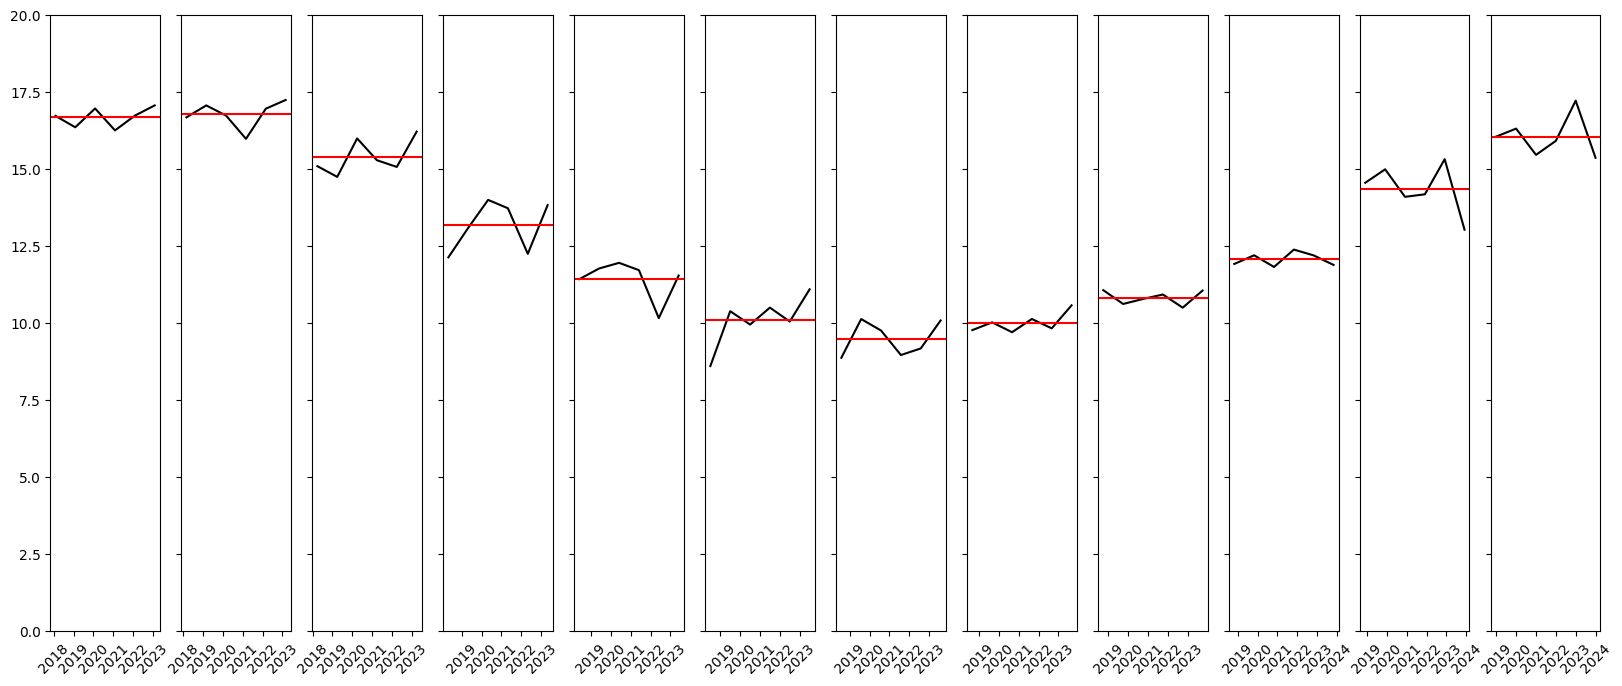

In [80]:
fig, axs = plt.subplots(1,12,figsize =(20,8),sharey = True)

for i in range(0,12):
    var_plot = df_resample[df_resample.index.month == i+1]
    axs[i].plot(var_plot, color = 'black')
    axs[i].axhline(np.mean(var_plot),color = 'red')
    axs[i].set_ylim([0,20])
    axs[i].tick_params(axis='x', rotation=45)
    

### 2.8.- Autocorrelation

In [99]:
import os 
import numpy as np
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

In [145]:
df_anomaly = df.loc['2020-01-01']-np.array(df.rolling(4).mean().loc['2020-01-01'].values)

In [149]:
auto_corr = np.array([df_anomaly['Temperature'].autocorr(lag = i) for i in range(1,30)])    

[]

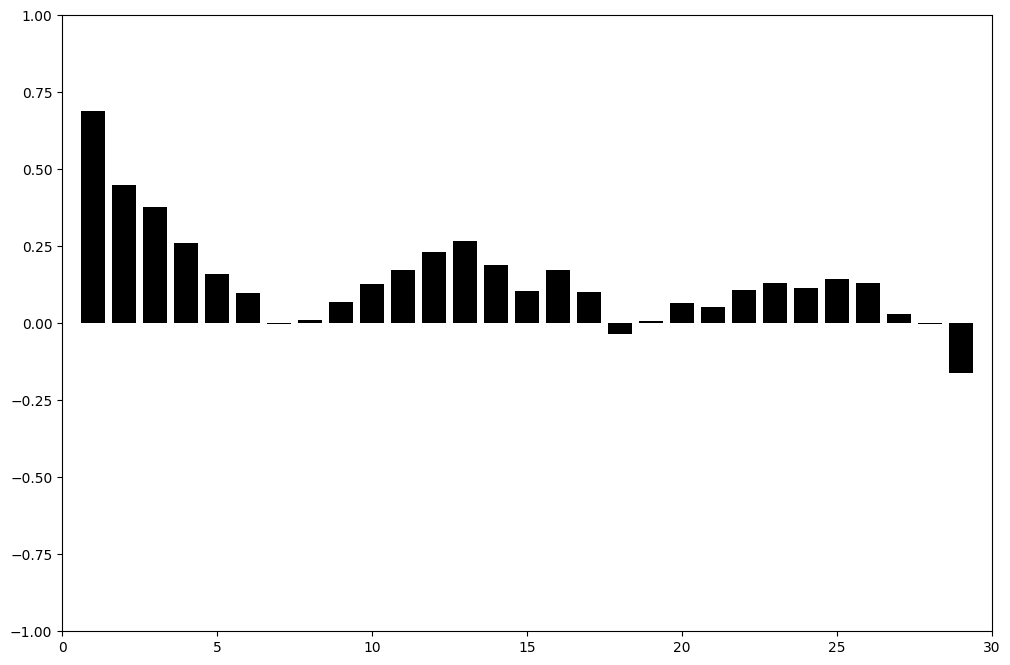

In [164]:
plt.figure(figsize=(12,8))
plt.bar(range(1,30),auto_corr,color = 'black')
plt.ylim([-1,1])
plt.xlim([0,30])
plt.plot()

### 2.9 White noise

For white noise series, we expect each autocorrelation to be close to zero. Of course, they will not be exactly equal to zero as there is some random variation. For a white noise series, we expect 95% of the spikes in the ACF to lie within $\pm 2/\sqrt{T}$ where T is the length of the time series. It is common to plot these bounds on a graph of the ACF. If one or more large spikes are outside these bounds, or if substantially more than 5% of spikes are outside these bounds, then the series is probably not white noise.

In [ ]:
import os 
import numpy as np
import pandas as pd 
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv() 
base_path = os.environ['PATH_SERIES']
path_temp = os.path.join(base_path,'temp_carrielsur.csv')

df = pd.read_csv(path_temp,names = ['Timestamp','Temperature'],header=0)
df.set_index(pd.to_datetime(df['Timestamp']),inplace = True)
df = df[['Temperature']]

In [ ]:
df_anomaly = df.loc['2020-01-01']-np.array(df.rolling(4).mean().loc['2020-01-01'].values)
auto_corr = np.array([df_anomaly['Temperature'].autocorr(lag = i) for i in range(1,30)])    

[]

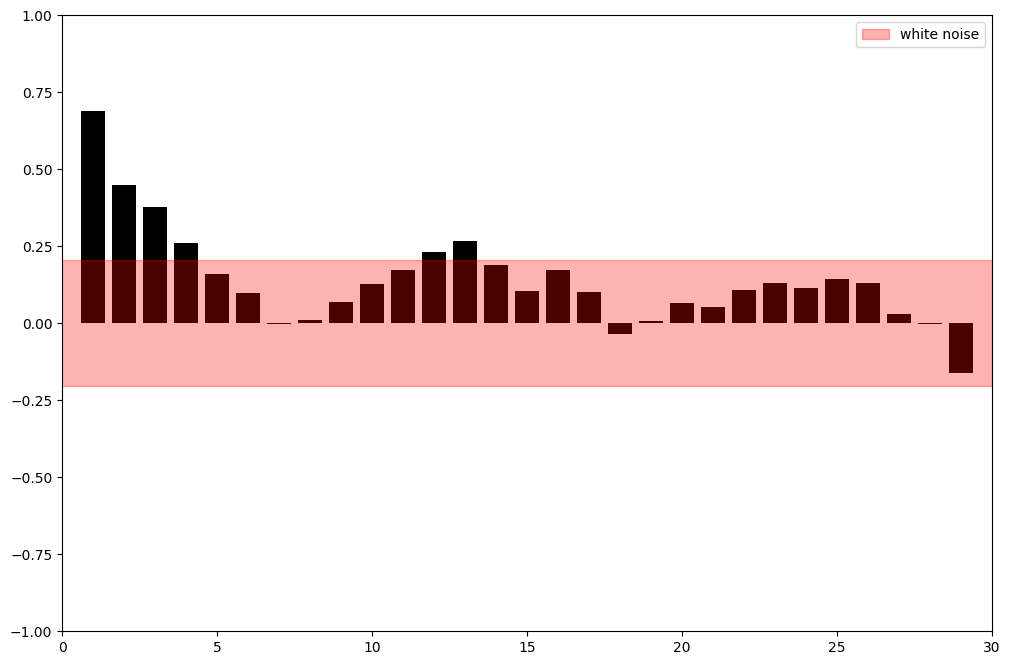

In [165]:
plt.figure(figsize=(12,8))
plt.bar(range(1,30),auto_corr,color = 'black')
plt.fill_between(range(-1,31),-2/np.sqrt(len(df_anomaly)),2/np.sqrt(len(df_anomaly)),color = 'red',alpha = 0.3,label = 'white noise')
plt.ylim([-1,1])
plt.xlim([0,30])
plt.legend()
plt.plot()

## 3.- Time series decomposition

Time series data can exhibit a variety of patterns, and it is often helpful to split a time series into several components, each representing an underlying pattern category.

### 3.1.- Transformation and adjustments

* **Calendar adjustments:** e.g.  if you are studying the total monthly sales in a retail store, there will be variation between the months simply because of the different numbers of trading days in each month, in addition to the seasonal variation across the year. It is easy to remove this variation by computing average sales per trading day in each month, rather than total sales in the month. Then we effectively remove the calendar variation.
* **Population adjustments:** Any data that are affected by population changes can be adjusted to give per-capita data.
* **Inflation adjustments:** Data which are affected by the value of money are best adjusted before modelling. [...] To make these adjustments, a price index is used. If  $z_{t}$ denotes the price index and  $y_{t}$ denotes the original house price in year  $t$, then  $x_{t} = y_{t}/z_{t} \cdot z_{2000}$ gives the adjusted house price at year 2000 dollar values. Price indexes are often constructed by government agencies. For consumer goods, a common price index is the Consumer Price Index (or CPI).
* **Mathematical transformation:** If the data shows variation that increases or decreases with the level of the series, then a transformation can be useful.

A useful family of transformations, that includes both logarithms and power transformations, is the family of Box-Cox transformations (Box & Cox, 1964), which depend on the parameter $\lambda$ and are defined as follows:

$
w_{t} = \log(y_{t}),\qquad \lambda = 0\\
w_{t} = (\text{sign}(y_{t})|y_{t}|^{\lambda}-1)/\lambda,\qquad \text{otherwise}.
$

In [1]:
import statsmodels.api as sm
#from scipy import stats
from sktime.transformations.series.boxcox import BoxCoxTransformer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

df = sm.datasets.get_rdataset('GoldSilver','AER').data
df.index = pd.to_datetime(df.index)

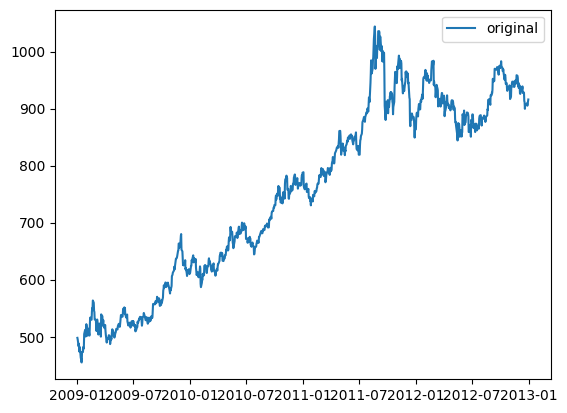

In [24]:
plt.figure()
plt.plot(df.loc['2009':'2012']['gold'], label = 'original')
plt.legend()
plt.show()

In [18]:
transformer = BoxCoxTransformer(method='guerrero',sp = 3)
y_hat = transformer.fit_transform(df.loc['2009':'2012']['gold'])
transformer.get_fitted_params()

#ts_boxcox, lmda = stats.boxcox(df.loc['2009':'2012']['gold'])
#ts_boxcox_10= stats.boxcox(df.loc['2009':'2012']['gold'],lmbda=0.9)

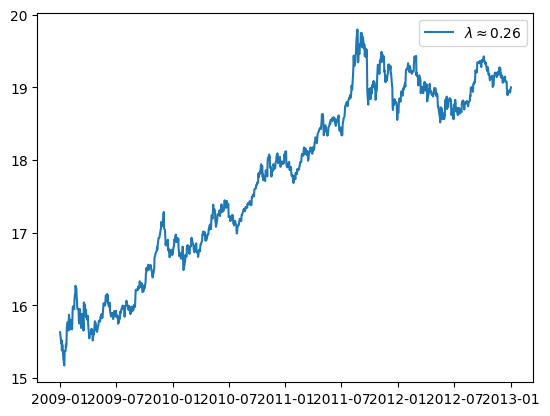

In [22]:
plt.figure()
plt.plot(df.loc['2009':'2012'].index,y_hat, label= r'$\lambda \approx 0.26$')
plt.legend()
plt.show()

### 3.2.- Time series components

If we assume an additive decomposition, then we can write $y_{t} = S_{t}+T_{t}+R_{t}$, where  $y_{t}$ is the data,  $S_{t}$ is the seasonal component, $T_{t}$ is the trend-cycle component, and $R_{t}$ is the remainder component, all at period $t$. Alternatively, a multiplicative decomposition would be written as $y_{t} = S_{t}\times T_{t}\times R_{t}$.

The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series.

An alternative to using a multiplicative decomposition is to first transform the data until the variation in the series appears to be stable over time, then use an additive decomposition. When a log transformation has been used, this is equivalent to using a multiplicative decomposition on the original data because $y_{t} = S_{t}\times T_{t}\times R_{t}$ is equivalent to $\log(y_{t}) = \log(S_{t})+\log(T_{t})+\log(R_{t})$.

### 3.3.- Moving averages

In [ ]:
import statsmodels.api as sm
#from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

df = sm.datasets.get_rdataset('GoldSilver','AER').data
df.index = pd.to_datetime(df.index)

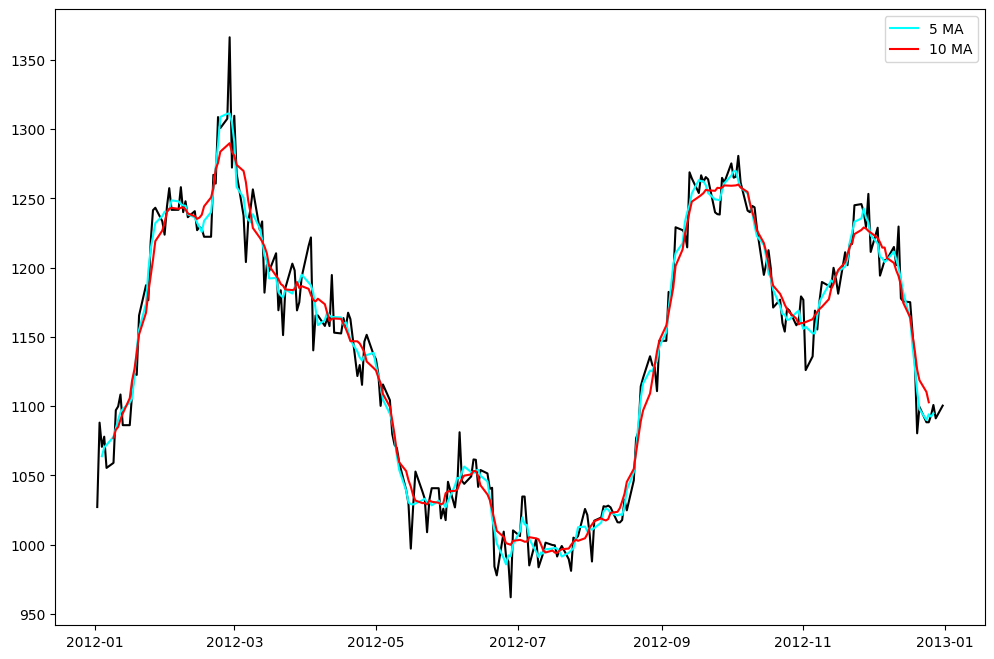

In [40]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2012']['silver'],color = 'black')
plt.plot(df.loc['2012']['silver'].rolling(5,center = True).mean(),color = 'cyan',label = '5 MA')
plt.plot(df.loc['2012']['silver'].rolling(10,center = True).mean(),color = 'red',label = '10 MA')
plt.legend()
plt.show()

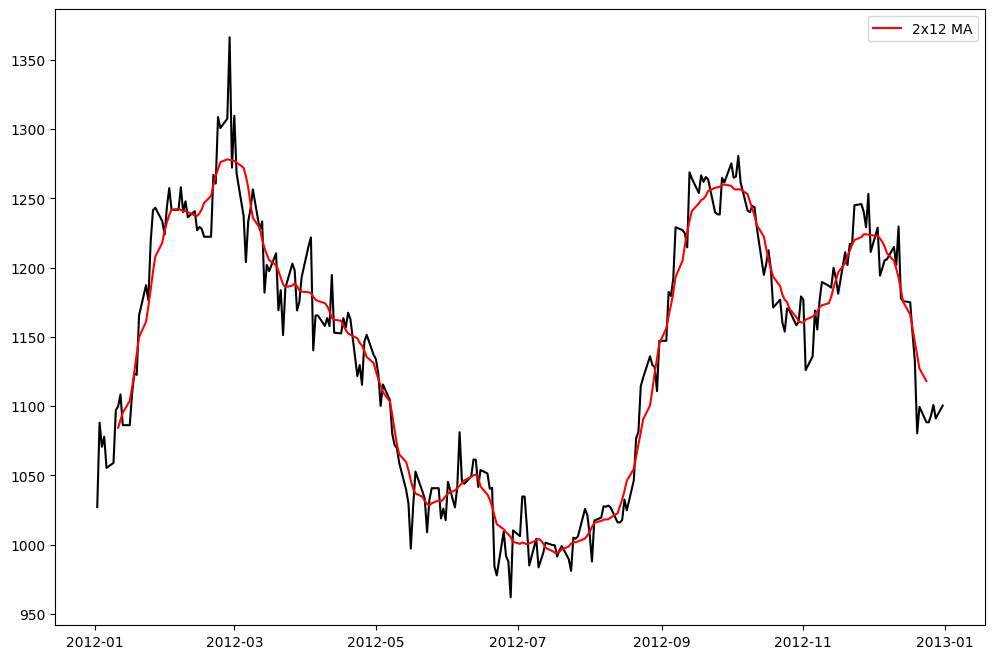

In [42]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2012']['silver'],color = 'black')
plt.plot(df.loc['2012']['silver'].rolling(12,center = True).mean().rolling(2,center = True).mean(),color = 'red',label = '2x12 MA')
plt.legend()
plt.show()

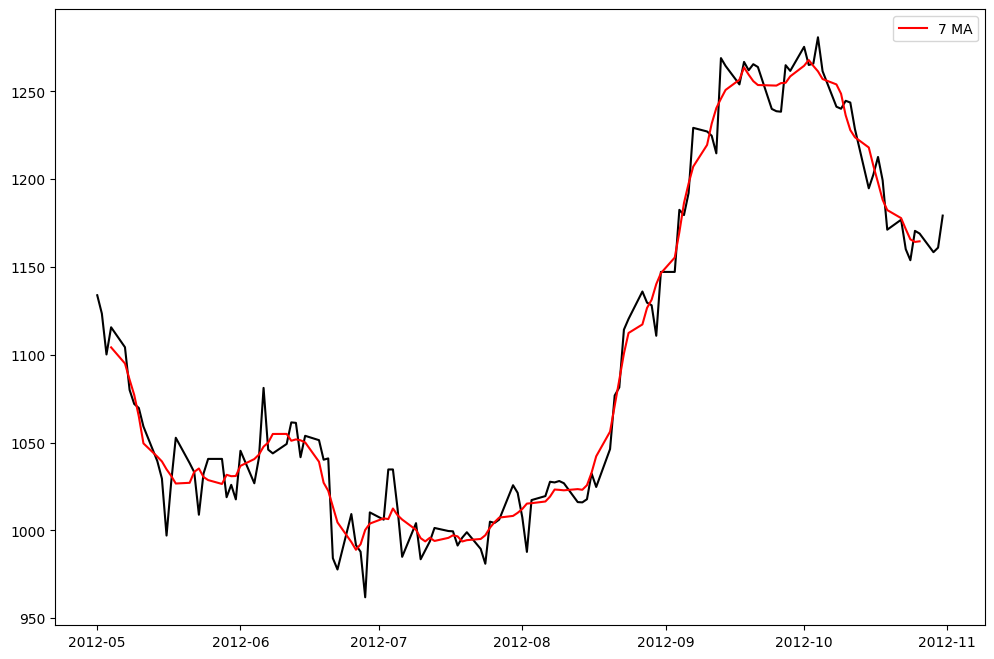

In [45]:
plt.figure(figsize=(12,8))
plt.plot(df.loc['2012-05':'2012-10']['silver'],color = 'black')
plt.plot(df.loc['2012-05':'2012-10']['silver'].rolling(7,center = True).mean(),color = 'red',label = '7 MA')
plt.legend()
plt.show()

### 3.4.- Classical decomposition

Additive decomposition

**Step 1**
If $m$ is an even number, compute the trend-cycle component $\hat{T}_{t}$ using a $2\times m$-MA. If $m$ is an odd number, compute the trend-cycle component $\hat{T}_{t}$ using a $m$-MA.

**Step 2**
Calculate the detrended series:  $y - \hat{T}_{t}$.

**Step 3**
To estimate the seasonal component for each season, simply average the detrended values for that season. For example, with monthly data, the seasonal component for March is the average of all the detrended March values in the data. These seasonal component values are then adjusted to ensure that they add to zero. The seasonal component is obtained by stringing together these monthly values, and then replicating the sequence for each year of data. This gives $\hat{S}_{t}$.

**Step 4**
The remainder component is calculated by subtracting the estimated seasonal and trend-cycle components: $\hat{R}_{s} = y_{t} - \hat{T}_{t} - \hat{S}_{t}$.

In [21]:
import statsmodels.api as sm
#from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

#df = sm.datasets.get_rdataset('nottem','datasets').data
df = sm.datasets.get_rdataset('co2','datasets').data
#df.index = pd.to_datetime(df.index)

df['time']=pd.date_range(start = '1959',end = '1998',freq='1M')
df.set_index('time',inplace = True)

In [75]:
series = df
trend = series.rolling(12,center = True).mean().rolling(2,center = True).mean()
detrend = series - trend
seasonal = np.nanmean(np.squeeze(detrend.values).reshape(int(len(detrend)/12),12),axis = 0)
seasonal = np.concatenate([seasonal]*(1997-1959+1))
remainder = np.squeeze(series) - np.squeeze(trend) - seasonal

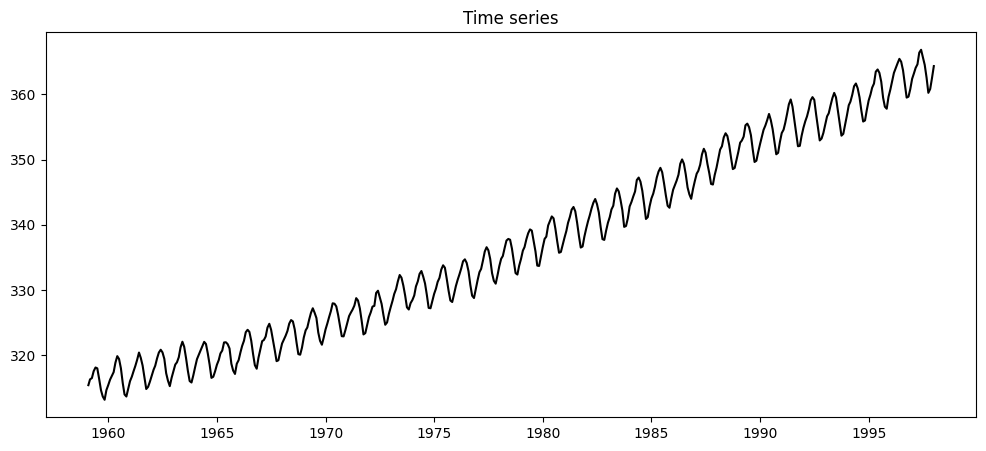

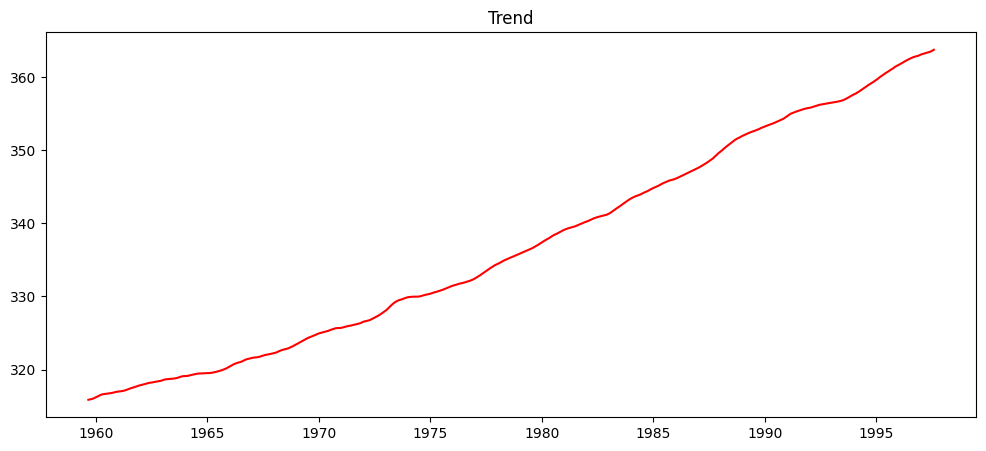

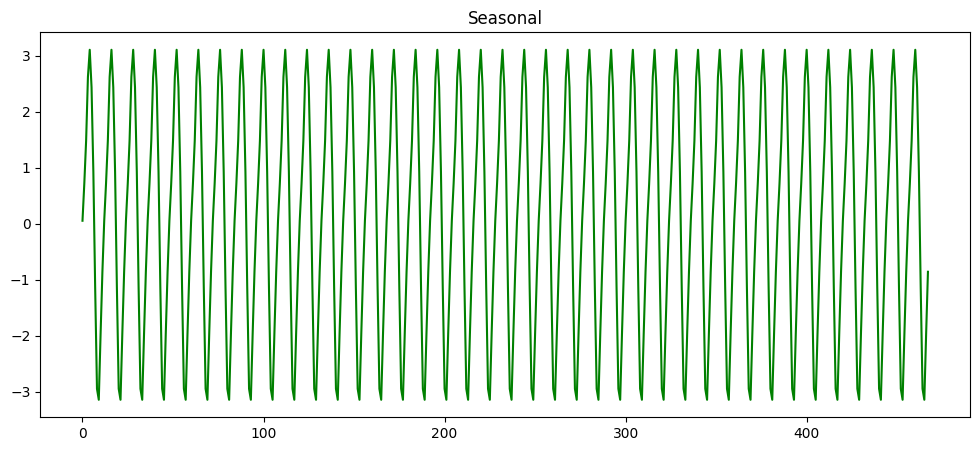

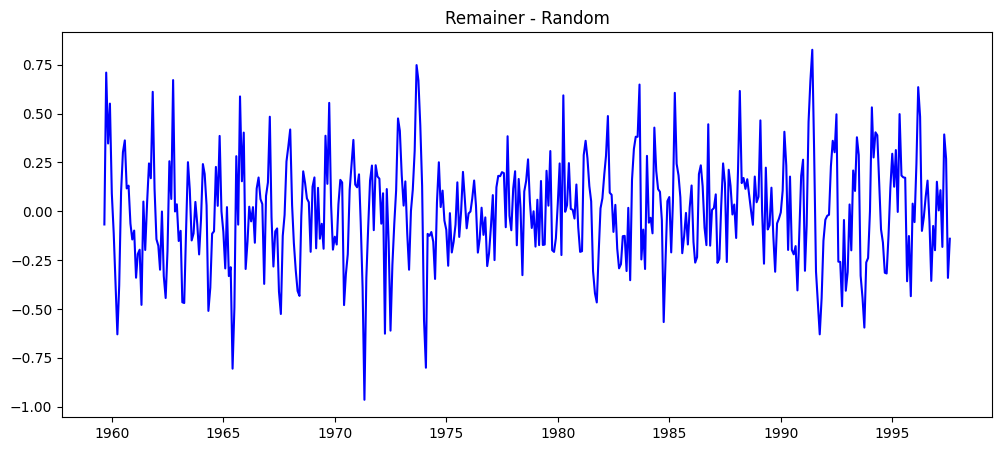

In [77]:
plt.figure(figsize=(12,5))
plt.plot(series,color = 'black')
plt.title('Time series')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(trend,color = 'red')
plt.title('Trend')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(seasonal,color = 'green')
plt.title('Seasonal')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(remainder,color = 'blue')
plt.title('Remainer - Random')
plt.show()

### 3.6.- STL decomposition

In [ ]:
import statsmodels.api as sm
#from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

#df = sm.datasets.get_rdataset('nottem','datasets').data
df = sm.datasets.get_rdataset('co2','datasets').data
#df.index = pd.to_datetime(df.index)

df['time']=pd.date_range(start = '1959',end = '1998',freq='1M')
df.set_index('time',inplace = True)

series = df
trend = series.rolling(12,center = True).mean().rolling(2,center = True).mean()
detrend = series - trend
seasonal = np.nanmean(np.squeeze(detrend.values).reshape(int(len(detrend)/12),12),axis = 0)
seasonal = np.concatenate([seasonal]*(1997-1959+1))
remainder = np.squeeze(series) - np.squeeze(trend) - seasonal

In [93]:
stl = STL(series, seasonal=13)
res = stl.fit()
trend_stl = res.trend
seasonal_stl = res.seasonal
resid_stl = res.resid

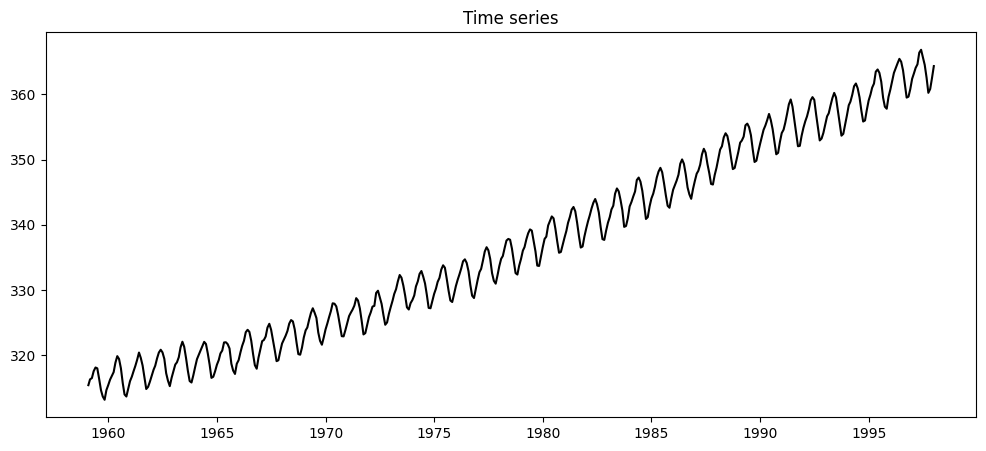

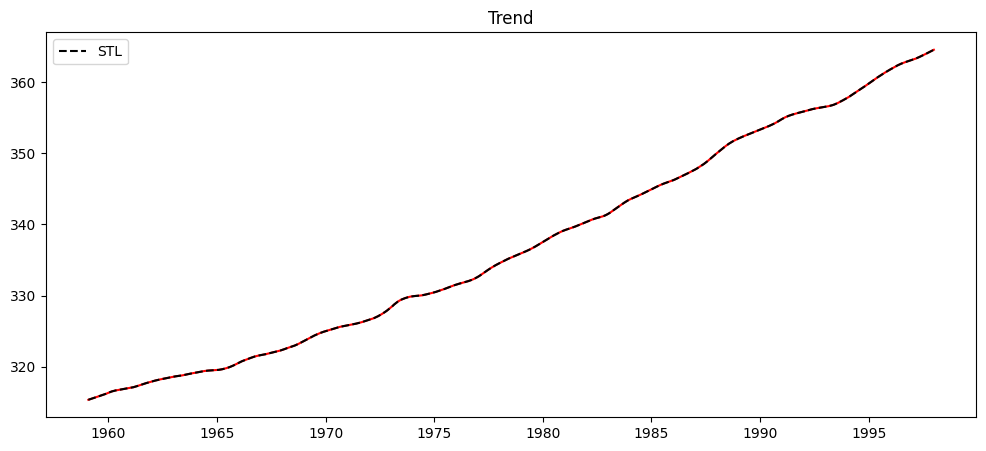

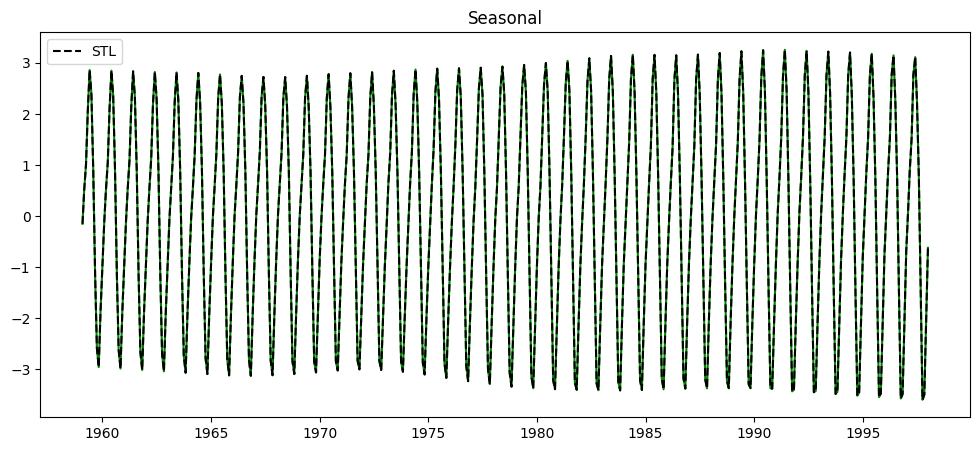

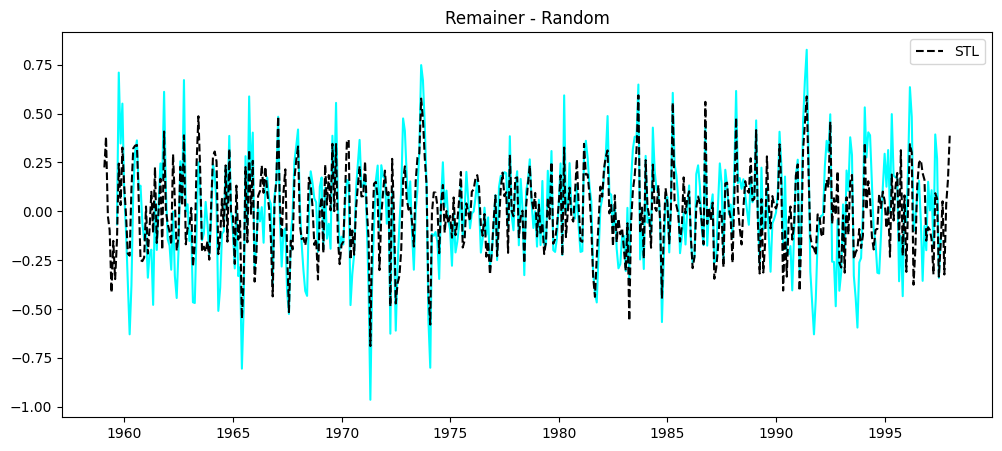

In [99]:
plt.figure(figsize=(12,5))
plt.plot(series,color = 'black')
plt.title('Time series')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(trend,color = 'red')
plt.plot(trend_stl,color = 'black', linestyle = '--',label = 'STL')
plt.title('Trend')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(seasonal,color = 'green')
plt.plot(seasonal_stl,color = 'black', linestyle = '--',label = 'STL')
plt.title('Seasonal')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(remainder,color = 'cyan')
plt.plot(resid_stl,color = 'black', linestyle = '--',label = 'STL')
plt.title('Remainer - Random')
plt.legend()
plt.show()

## 4.- Time series features

In [109]:
import statsmodels.api as sm
#from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn

#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

#df = sm.datasets.get_rdataset('nottem','datasets').data
df = sm.datasets.get_rdataset('CollegeDistance','AER').data
#df.index = pd.to_datetime(df.index)

In [102]:
df.describe()

,score,unemp,wage,distance,tuition,education
count,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000
mean,50.889029,7.597215,9.500506,1.802870,0.814608,13.807765
std,8.701910,2.763581,1.343067,2.297128,0.339504,1.789107
min,28.950001,1.400000,6.590000,0.000000,0.257510,12.000000
25%,43.924999,5.900000,8.850000,0.400000,0.484990,12.000000
50%,51.189999,7.100000,9.680000,1.000000,0.824480,13.000000
75%,57.769999,8.900000,10.150000,2.500000,1.127020,16.000000
max,72.809998,24.900000,12.960000,20.000000,1.404160,18.000000


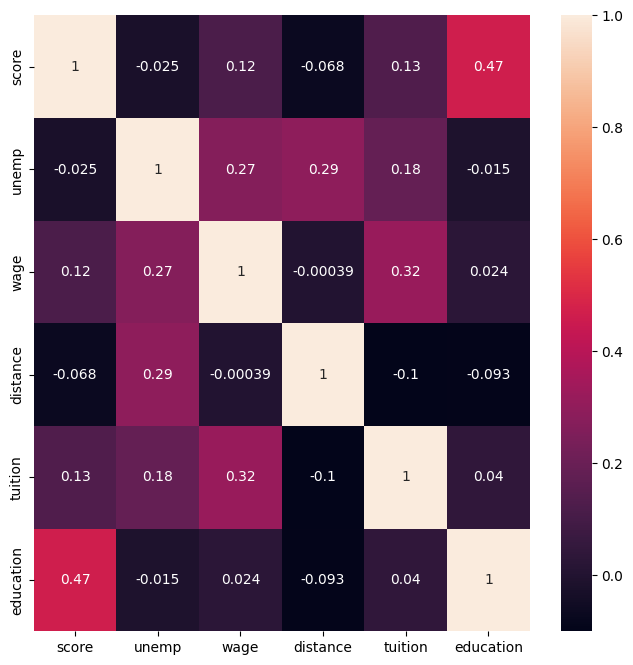

In [110]:
corr_matrix = df[['score','unemp','wage','distance','tuition','education']].corr()

plt.figure(figsize=(8,8))
sn.heatmap(corr_matrix, annot=True)
plt.show()

## 5.- The forcaster's toolbox

### 5.1.- A tidy forecasting workflow

* **Data preparation (tidy):** The first step in forecasting is to prepare data in the correct format. This process may involve loading in data, identifying missing values, filtering the time series, and other pre-processing tasks.
* **Plot the data (visualise):** As we have seen in Chapter 2, visualisation is an essential step in understanding the data. Looking at your data allows you to identify common patterns, and subsequently specify an appropriate model.
* **Define a model (specify):** Specifying an appropriate model for the data is essential for producing appropriate forecasts.
* **Train the model (estimate):** Once an appropriate model is specified, we next train the model on some data.
* **Check model performance (evaluate):** Once a model has been fitted, it is important to check how well it has performed on the data. There are several diagnostic tools available to check model behaviour, and also accuracy measures that allow one model to be compared against another.
* **Produce forecasts (forcast):** With an appropriate model specified, estimated and checked, it is time to produce the forecasts using forecast(). The easiest way to use this function is by specifying the number of future observations to forecast. In other situations, it may be more convenient to provide a dataset of future time periods to forecast. This is commonly required when your model uses additional information from the data, such as exogenous regressors. Additional data required by the model can be included in the dataset of observations to forecast.

### 5.2.- Some simple forecasting methods

* **Mean method**

Here, the forecasts of all future values are equal to the average (or “mean”) of the historical data. If we let the historical data be denoted by  $y_{1},...,y_{T}$, then we can write the forecasts as

$
\hat{y}_{T+h|T} = \bar{y} = \frac{1}{T}\Sigma_{t=1}^{T}y_{t}.
$

The notation $\hat{y}_{T+h|T}$ is a short-hand for the estimate of $y_{T+h}$ based on the data $y_{1},...,y_{T}$.

* **Naîve method**

For naïve forecasts, we simply set all forecasts to be the value of the last observation. That is,

$
\hat{y}_{T+h|T} = y_{T}.
$
 
This method works remarkably well for many economic and financial time series.

* **Seasonal naîve method**

A similar method is useful for highly seasonal data. In this case, we set each forecast to be equal to the last observed value from the same season (e.g., the same month of the previous year). Formally, the forecast for time  $T+h$ is written as

$
\hat{y}_{T+h|T} = y_{T+h-m(k+1)},
$
 
where $m=$ the seasonal period, and $k$ is the integer part of $(h-1)/m$ (i.e., the number of complete years in the forecast period prior to time $T+h$). This looks more complicated than it really is. For example, with monthly data, the forecast for all future February values is equal to the last observed February value. With quarterly data, the forecast of all future Q2 values is equal to the last observed Q2 value (where Q2 means the second quarter). Similar rules apply for other months and quarters, and for other seasonal periods.

* **Drift method**

A variation on the naïve method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the average change seen in the historical data. Thus the forecast for time $T+h$ is given by

$
\hat{y}_{T+h|T} = y_{T} + \frac{h}{T-1}\Sigma_{t=2}^{T}(y_{t}-y_{t-1}) = y_{T} + h\left(\frac{y_{T}-y_{1}}{T-1}\right).
$

This is equivalent to drawing a line between the first and last observations, and extrapolating it into the future.


In [12]:
import statsmodels.api as sm
#from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

df = sm.datasets.get_rdataset('GoldSilver','AER').data
df.index = pd.to_datetime(df.index)
df_ = df['gold'].loc['2011':'2011-10'].values

In [111]:
h = 15

forecast_mean = [np.mean(df_)]*h

forecast_naive = [df_[-1]]*h

m = 30
forecast_seasonalnaive = [df_[i-m + m*int(np.floor((i-1)/m))] for i in range(1,h+1)]

forecast_drift = [df_[-1]+i*(df_[-1] - df_[0])/(len(df_)-1) for i in range(1,h+1)]

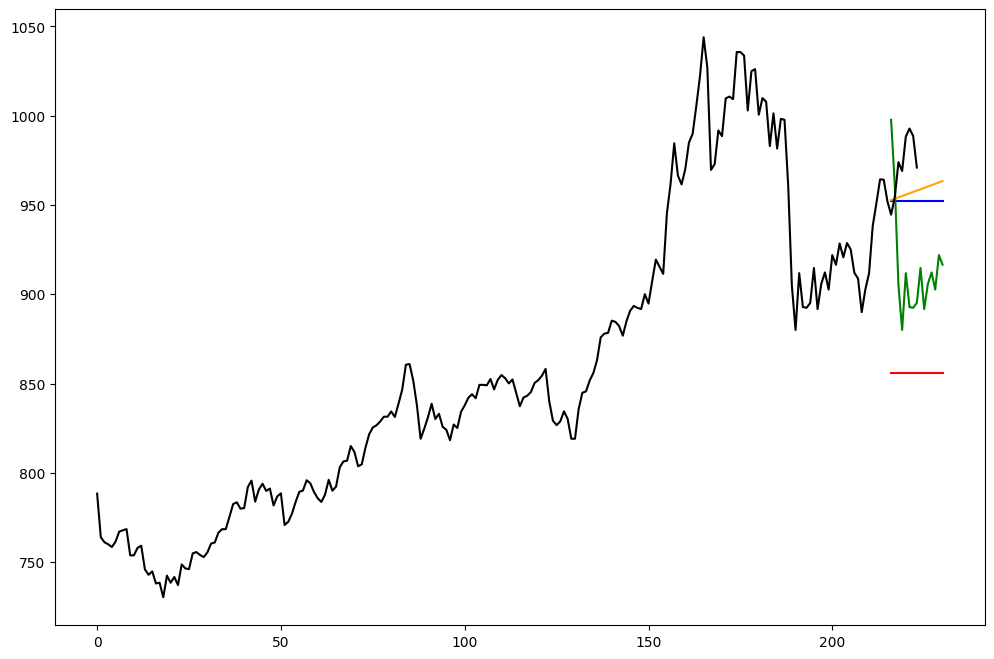

In [112]:
fig = plt.figure(figsize = (12,8))

range(len(df_),len(df_)+10)
plt.plot(range(len(df_),len(df_)+h),np.array(forecast_mean),color = 'red')
plt.plot(range(len(df_),len(df_)+h),np.array(forecast_naive),color = 'blue')
plt.plot(range(len(df_),len(df_)+h),np.array(forecast_seasonalnaive),color = 'green')
plt.plot(range(len(df_),len(df_)+h),np.array(forecast_drift),color = 'orange')
#plt.plot(np.concatenate((df_,np.array(forecast_mean))),color = 'green')
#plt.plot(np.concatenate((df_,np.array(forecast_naive))),color = 'red')
#plt.plot(np.concatenate((df_,np.array(forecast_seasonalnaive))),color = 'blue')
#plt.plot(np.concatenate((df_,np.array(forecast_drift))),color = 'orange')

plt.plot(df['gold'].loc['2011':'2011-11-10'].values,color = 'black')

### 5.5 Distributional forecast and prediction intervals

**Forecast distributions** 

[...]  we express the uncertainty in our forecasts using a probability distribution. It describes the probability of observing possible future values using the fitted model. The point forecast is the mean of this distribution. Most time series models produce normally distributed forecasts — that is, we assume that the distribution of possible future values follows a normal distribution. We will look at a couple of alternatives to normal distributions later in this section.

**Prediction intervals**

A prediction interval gives an interval within which we expect $y_{t}$ to lie with a specified probability. For example, assuming that distribution of future observations is normal, a 95% prediction interval for the  $h$-step forecast is

$
y_{T+h|Y}\pm 1.96\hat{\sigma}_{h},
$
where $\hat{\sigma}_{h}$ is an estimate of the standard deviation of the  
$h$-step forecast distribution.

More generally, a prediction interval can be written as

$
y_{T+h|Y}\pm c\hat{\sigma}_{h},
$
 
where the multiplier $c$ depends on the coverage probability.

| Percentage   |      Multiplier      |
|----------|:-------------:|
| 99 | 2.58  |
| 98 | 2.33  |
| 97 | 2.17  |
| 96 | 2.05  |
| 95 | 1.96  |
| 90 | 1.64  |
| 85 | 1.44  |
| 80 | 1.28  |
| 75 | 1.15  |
| 70 | 1.04  |

**One-step prediciton intervals**

When forecasting one step ahead, the standard deviation of the forecast distribution can be estimated using the standard deviation of the residuals given by

$
\hat{\sigma} = \sqrt{\frac{1}{T-K-M}\Sigma_{y = 1}^{T}e_{t}^{2}}
$

where $K$ is the number of parameters estimated in the forecasting method, and $M$ is the number of missing values in the residuals. (For example, $M = 1$ for a naive forecast, because we can’t forecast the first observation.)

**Multi-step prediciton intervals**

A common feature of prediction intervals is that they usually increase in length as the forecast horizon increases. The further ahead we forecast, the more uncertainty is associated with the forecast, and thus the wider the prediction intervals. That is, $\sigma_{h}$ usually increases with $h$ (although there are some non-linear forecasting methods which do not have this property).

[...] For multi-step forecasts, a more complicated method of calculation is required. These calculations assume that the residuals are uncorrelated.

**Benchmark methods**

For the four benchmark methods, it is possible to mathematically derive the forecast standard deviation under the assumption of uncorrelated residuals

| Benchmark method   |      $h$-step forecast standard deviation      |
|----------|:-------------:|
| Mean | $\hat{\sigma}_{h} = \hat{\sigma}\sqrt{1+1/T}$  |
| Naive | $\hat{\sigma}_{h} = \hat{\sigma}\sqrt{h}$  |
| Seasonal naive | $\hat{\sigma}_{h} = \hat{\sigma}\sqrt{k+1}$  |
| Drift | $\hat{\sigma}_{h} = \hat{\sigma}\sqrt{h(1+h/(T-1))}$  |


**Prediction intervals from bootstrapped residuals**

When a normal distribution for the residuals is an unreasonable assumption, one alternative is to use bootstrapping, which only assumes that the residuals are uncorrelated with constant variance. We will illustrate the procedure using a naïve forecasting method.

A one-step forecast error is defined as $e_{t}=y_{t}-\hat{y}_{t|t-1}$. For a naïve forecasting method, $\hat{y}_{t|t-1} = t_{t-1}$ , so we can rewrite this as

$
y_{t} = y_{t-1} + e_{t}
$

Assuming future errors will be similar to past errors, when $t>T$ we can replace $e_{t}$ by sampling from the collection of errors we have seen in the past (i.e., the residuals). So we can simulate the next observation of a time series using

$
y^{*}_{T+1} = y_{T} + e_{T+1}^{*}
$

where $e_{T+1}^{*}$ is a randomly sampled error from the past, and $y^{*}_{T+1}$ is the possible future value that would arise if that particular error value occurred. We use a * to indicate that this is not the observed $y_{T+1}$ value, but one possible future that could occur.

In [113]:
import statsmodels.api as sm
#from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

#Datasets: https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

df = sm.datasets.get_rdataset('GoldSilver','AER').data
df.index = pd.to_datetime(df.index)
df_ = df['gold'].loc['2011':'2011-10'].values

In [140]:
def forecast_bootstrap_naive(y,h):
    e_star = y[1::]-y[:-1]
    forecast = []
    for _ in range(h):
        e_star_tp1 = e_star[np.random.randint(0, len(e_star)-1)]
        if _ == 0:
            forecast.append(y[-1] + e_star_tp1)
        else:
            forecast.append(forecast[-1] + e_star_tp1)
    return forecast

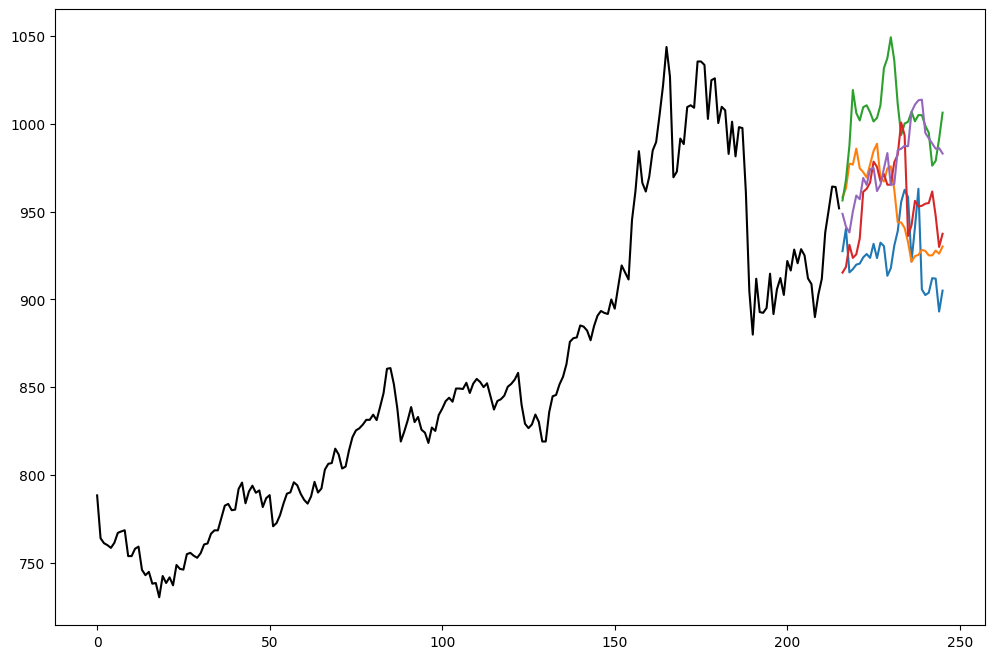

In [194]:
h = 30

fig = plt.figure(figsize = (12,8))
for _ in range(5):
    plt.plot(range(len(df_),len(df_)+h),np.array(forecast_bootstrap_naive(df_,h)))


plt.plot(df_,color = 'black')

In [188]:
bootstrap = []
for _ in range(10000):
    bootstrap.append(np.array(forecast_bootstrap_naive(df_,h)))
bootstrap = np.array(bootstrap)

In [200]:
mean_of_forecast.shape

(30,)

In [202]:
df_.shape

(216,)

In [218]:
df['gold'].loc['2011':'2011-12-12'].values.shape

(246,)

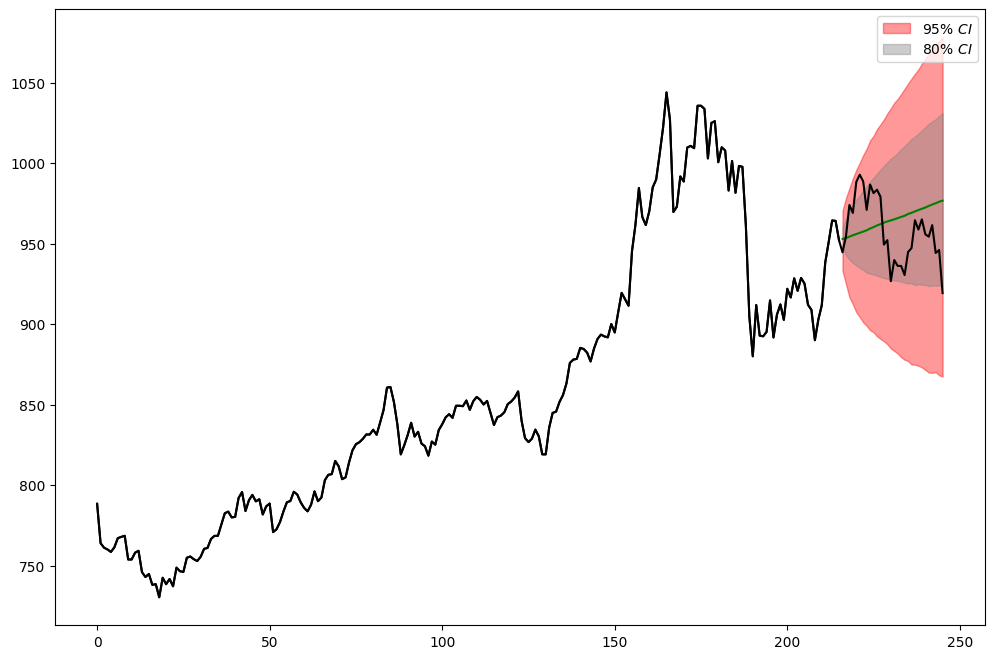

In [219]:
mean_of_forecast = np.mean(bootstrap,axis = 0)
p95_of_forecast = np.percentile(bootstrap,95,axis = 0)
p05_of_forecast = np.percentile(bootstrap,5,axis = 0)
p80_of_forecast = np.percentile(bootstrap,80,axis = 0)
p20_of_forecast = np.percentile(bootstrap,20,axis = 0)

fig = plt.figure(figsize = (12,8))

plt.plot(range(len(df_),len(df_)+h),mean_of_forecast,color = 'green')
plt.fill_between(range(len(df_),len(df_)+h),p05_of_forecast,p95_of_forecast, color = 'red',alpha = 0.4,label = r'$95\%\ CI$')
plt.fill_between(range(len(df_),len(df_)+h),p80_of_forecast,p20_of_forecast, color = 'grey',alpha = 0.4,label = r'$80\%\ CI$')

plt.plot(df['gold'].loc['2011':'2011-12-12'].values,color = 'black')
plt.plot(df_,color = 'black')
plt.legend()